In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [2]:
import requests
import io

In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = requests.get(URL)
text = io.StringIO(resp.text)

In [4]:
df = pd.read_csv(text)

In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

## TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

In [7]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()    

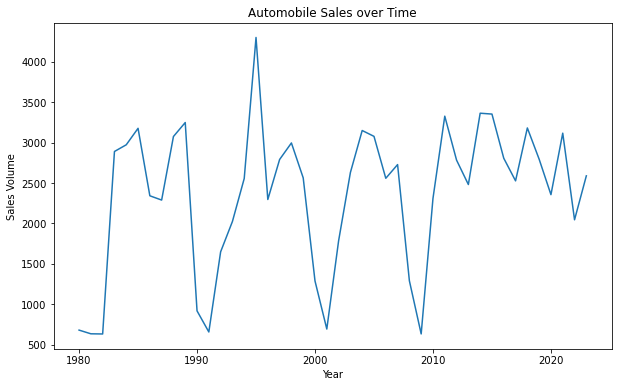

In [8]:
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.show()

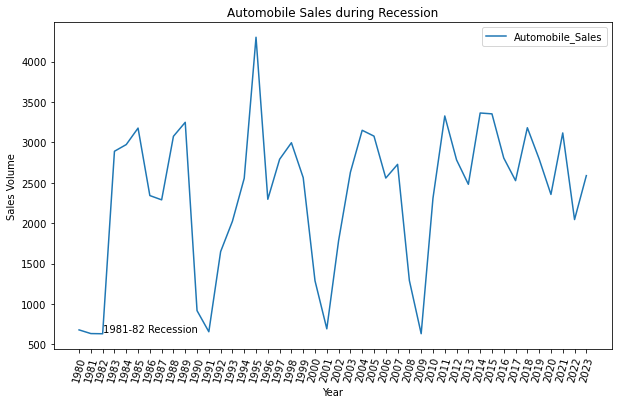

In [9]:
plt.figure(figsize=(10, 6))
df_line = df.groupby('Year')['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.legend()
plt.show()

## TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?¶

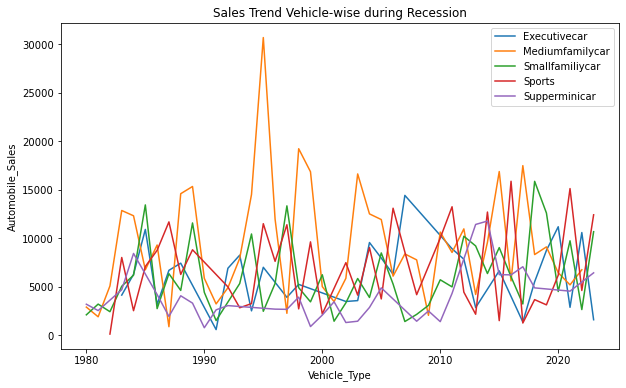

In [10]:
plt.figure(figsize=(10, 6))
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Vehicle_Type')
plt.ylabel('Automobile_Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

### From the above plot, what insights have you gained on the sales of various vehicle types?
From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.
while sales of the superminicar and smallfamilycar increased.


## TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

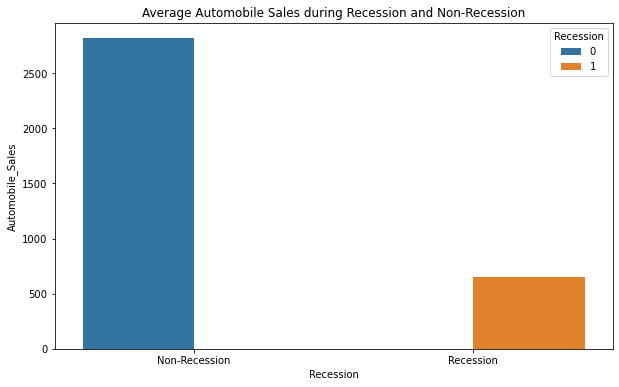

In [11]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('Automobile_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

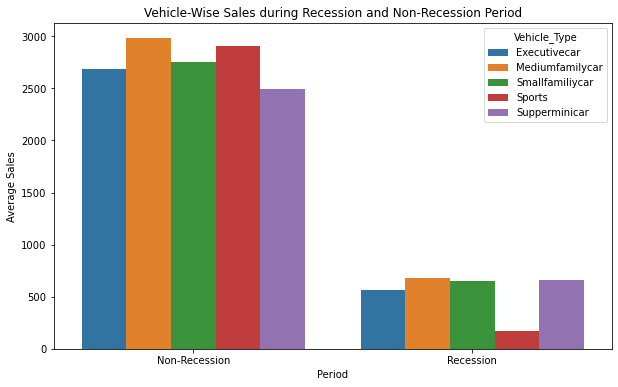

In [12]:
recession_data = df[df['Recession'] == 1]
dd = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

### From the above chart what insights have you gained on the overall sales of automobiles during recession?
From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports


## TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

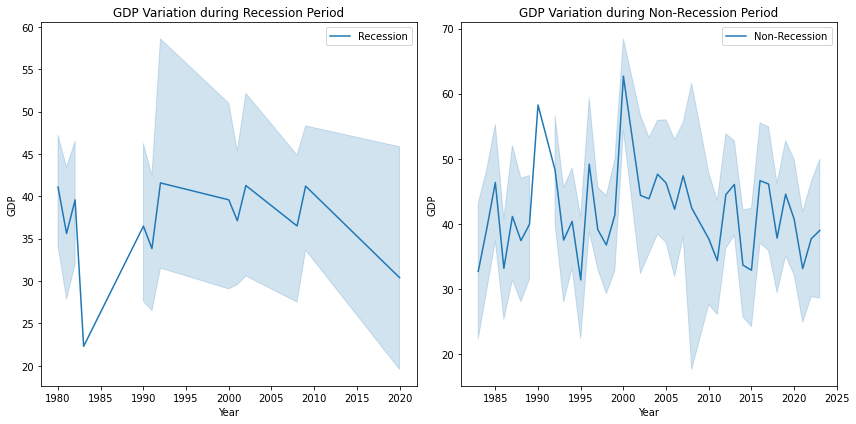

In [13]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

fig=plt.figure(figsize=(12, 6))

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 
    
#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
    
plt.tight_layout()
plt.show()

## TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

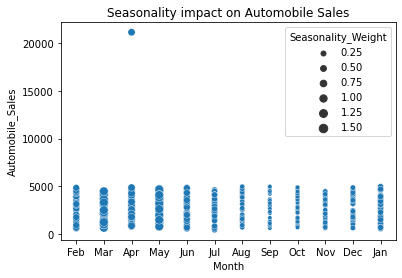

In [14]:
non_rec_data = df[df['Recession'] == 0]   
size = non_rec_data['Seasonality_Weight'] 
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

## TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

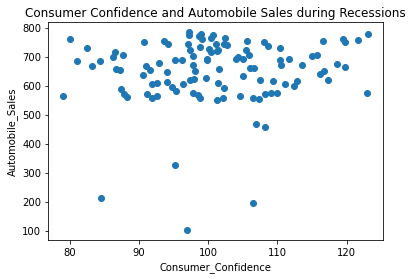

In [15]:
rec_data = df[df['Recession'] == 1]

plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

### How does the average vehicle price relate to the sales volume during recessions?

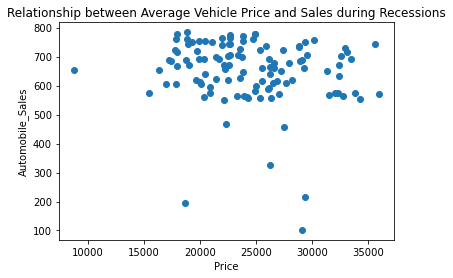

In [16]:
rec_data = df[df['Recession'] == 1]

plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

There is not much relation!

## TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

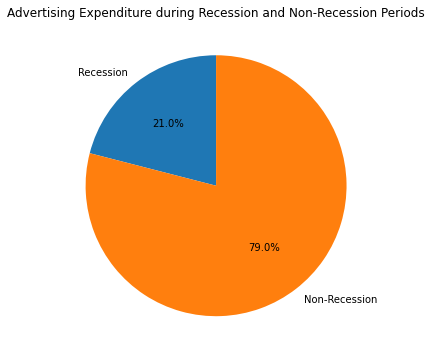

In [17]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?
It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

## TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

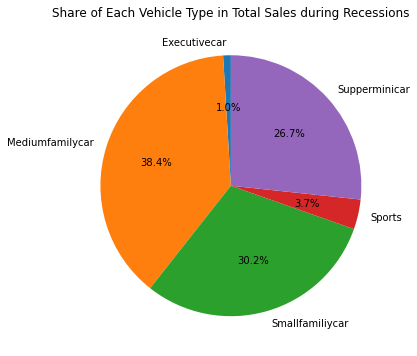

In [18]:
Rdata = df[df['Recession'] == 1]
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))
labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')
plt.show()

## TASK 1.9: Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

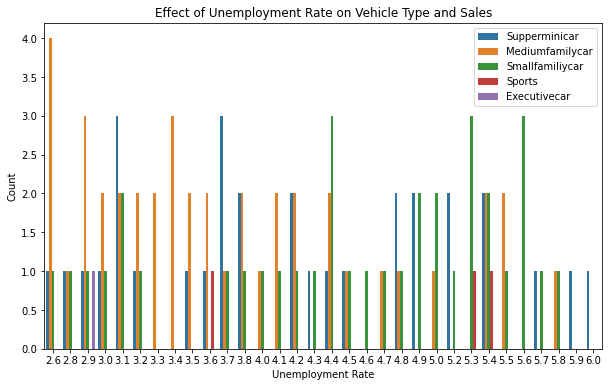

In [19]:
data= df[df['Recession'] == 1]
    
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')   
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()

### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?
During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar

## OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

In [20]:
from pyodide.http import pyfetch

path2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'


In [21]:
recession_data = data[data['Recession'] == 1]
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

choropleth = folium.Choropleth(geo_data= path2, data=sales_by_city,columns=['City', 'Automobile_Sales'],key_on='feature.properties.name',fill_color='YlOrRd',fill_opacity=0.7,line_opacity=0.2,legend_name='Automobile Sales during Recession' ).add_to(map1)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['name'], labels=True))
map1